# Sorting Lists, Tuples, and Objects 

[Sorting Lists, Tuples, and Objects by Corey Schafer](https://www.youtube.com/watch?v=D3JvDWO-BY4&index=20&list=PL-osiE80TeTt2d9bfVyTiXJA-UTHn6WwU)

# UFunction sorted 

In [1]:
a = [9, 1, 8, 2, 7, 3, 6, 4, 5]
a = sorted(a)
# a = sorted(a, reverse=True)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
a = (9, 1, 8, 2, 7, 3, 6, 4, 5)
a = sorted(a)
# a = sorted(a, reverse=True)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
a = {'name': 'Jake', 'job': 'Programming', 'age': '29', 'os': 'Mac'}
# a = sorted(a)
# a = sorted(a, reverse=True)
a = sorted(dict([(value, key) for key, value in a.items()]))
print(a)

['29', 'Jake', 'Mac', 'Programming']


In [4]:
a = {'name', 'Jake', 'job', 'Programming', 'age', 'os', 'Mac'}
a = sorted(a)
# a = sorted(a, reverse=True)
print(a)

['Jake', 'Mac', 'Programming', 'age', 'job', 'name', 'os']


In [3]:
a = [(3,34), (2,35), (4,30), (3,33)]
a = sorted(a)
print(a)

[(2, 35), (3, 33), (3, 34), (4, 30)]

In [10]:
import numpy as np
a = [(3,34), (2,35), (4,30), (3,33)]
a = np.array(sorted(a))
print(a)

[[ 2 35]
 [ 3 33]
 [ 3 34]
 [ 4 30]]


In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [16]:
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
print(type(mnist.target[0]))

<class 'numpy.int8'>


In [12]:
print(dir(mnist))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']


In [14]:
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [17]:
print(mnist.target[:10])

[5 0 4 1 9 2 1 3 1 4]


In [18]:
x = mnist.data
y = mnist.target

In [19]:
reordered_index = np.array(sorted([(label, i) for i, label in enumerate(y)]))[:,1]
x = x[reordered_index]
y = y[reordered_index]

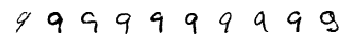

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
imgs = x[69000:69000+10]
fig, axes = plt.subplots(1,10)
for i in range(10):
    axes[i].imshow(imgs[i].reshape((28,28)), cmap=plt.cm.binary)
    axes[i].axis('off')
plt.show()

# List Method sort

In [4]:
my_list = [9, 1, 8, 2, 7, 3, 6, 4, 5]
my_list.sort()
my_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
# my_tuple = (9, 1, 8, 2, 7, 3, 6, 4, 5)
# my_tuple.sort()
# my_tuple

# AttributeError: 'tuple' object has no attribute 'sort'

In [6]:
# my_dictionary = {'name': 'Jake', 'job': 'Programming', 'age': None, 'os': 'Mac'}
# my_dictionary.sort()
# my_dictionary

# AttributeError: 'dict' object has no attribute 'sort'

List Method sort는 리스트 자체를 inplace로 소트합니다.
inplace로 소트한다는 표시로 None을 return합니다.

In [7]:
my_list = [9, 1, 8, 2, 7, 3, 6, 4, 5]
my_list_sorted = my_list.sort() 
print(my_list_sorted)

None


리스트 자체는 이미 소트되었습니다.

In [8]:
my_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

역순으로 소트하려면, reverse=True를 이용하면 됩니다. 

In [9]:
my_list = [9, 1, 8, 2, 7, 3, 6, 4, 5]
my_list.sort(reverse=True)
my_list

[9, 8, 7, 6, 5, 4, 3, 2, 1]

절대값 함수를 적용시켜서 나오는 순서를 이용 소트하려면, key=abs를 이용하면 됩니다. 

In [10]:
my_list = [9, -1, 8, 2, -7, 3, -6, 4, -5]
my_list.sort(key=abs)
my_list

[-1, 2, 3, 4, -5, -6, -7, 8, 9]

# Sorting Example using Class

In [11]:
class Employee():
    def __init__(self, name, age, salary):
        self.name = name
        self.age = age
        self.salary = salary

    def __repr__(self):
        return '({}, {}, ${})'.format(self.name, self.age, self.salary)

In [12]:
e1 = Employee('Carl', 37, 70000)
e2 = Employee('Sarah', 29, 80000)
e3 = Employee('John', 43, 90000)

In [13]:
employees = [e1, e2, e3]

##### 이름으로 소팅하기

In [14]:
def e_sort(emp):
    return emp.name

In [15]:
employees_sorted = sorted(employees, key=e_sort)
employees_sorted

[(Carl, 37, $70000), (John, 43, $90000), (Sarah, 29, $80000)]

In [16]:
employees.sort(key=e_sort)
employees

[(Carl, 37, $70000), (John, 43, $90000), (Sarah, 29, $80000)]

##### 나이로 소팅하기

In [17]:
def e_sort(emp):
    return emp.age

In [18]:
employees_sorted = sorted(employees, key=e_sort)
employees_sorted

[(Sarah, 29, $80000), (Carl, 37, $70000), (John, 43, $90000)]

In [19]:
employees.sort(key=e_sort)
employees

[(Sarah, 29, $80000), (Carl, 37, $70000), (John, 43, $90000)]

##### 월급으로 소팅하기

In [20]:
def e_sort(emp):
    return emp.salary

In [21]:
employees_sorted = sorted(employees, key=e_sort)
employees_sorted

[(Carl, 37, $70000), (Sarah, 29, $80000), (John, 43, $90000)]

In [22]:
employees.sort(key=e_sort)
employees

[(Carl, 37, $70000), (Sarah, 29, $80000), (John, 43, $90000)]

##### 월급으로 reverse 소팅하기 

In [23]:
def e_sort(emp):
    return emp.salary

In [24]:
employees_sorted = sorted(employees, key=e_sort)
employees_sorted

[(Carl, 37, $70000), (Sarah, 29, $80000), (John, 43, $90000)]

In [25]:
employees.sort(key=e_sort, reverse=True)
employees

[(John, 43, $90000), (Sarah, 29, $80000), (Carl, 37, $70000)]

##### key에 들어가는 함수로 lambda 함수를 이용, 소팅하기   

In [26]:
employees_sorted = sorted(employees, key=lambda e: e.salary, reverse=True)
print(employees_sorted)

[(John, 43, $90000), (Sarah, 29, $80000), (Carl, 37, $70000)]


In [27]:
employees.sort(key=lambda e: e.salary, reverse=True)
employees

[(John, 43, $90000), (Sarah, 29, $80000), (Carl, 37, $70000)]

##### attribute를 선택하는 함수 ```from operator import attrgetter```를 이용, 소팅하기   

In [28]:
from operator import attrgetter

In [29]:
employees_sorted = sorted(employees, key=attrgetter('salary'), reverse=True)
print(employees_sorted)

[(John, 43, $90000), (Sarah, 29, $80000), (Carl, 37, $70000)]


In [30]:
employees.sort(key=attrgetter('salary'), reverse=True)
employees

[(John, 43, $90000), (Sarah, 29, $80000), (Carl, 37, $70000)]